In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("Data//MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Value         5094 non-null   object
 2   Column_Order  5094 non-null   int64 
 3   Description   5094 non-null   object
 4   Unit          5094 non-null   object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


In [4]:
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [7]:
df = df.drop(df[df['Value'] == 'Not Available'].index, axis=0)

In [8]:
df['Value'] = df['Value'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2979 entries, 1989-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           2979 non-null   object 
 1   Value         2979 non-null   float64
 2   Column_Order  2979 non-null   int64  
 3   Description   2979 non-null   object 
 4   Unit          2979 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 139.6+ KB


## Trực quan hóa

In [10]:
df1 = df[df['Description'] == 'Natural Gas Electric Power Sector CO2 Emissions']

In [11]:
df1.reset_index(inplace=True)

In [12]:
df1 = df1[['YYYYMM','Value']]
df1.head()

,YYYYMM,Value
0,1989-01-01,8.890
1,1989-02-01,10.420
2,1989-03-01,12.758
3,1989-04-01,14.187
4,1989-05-01,15.128


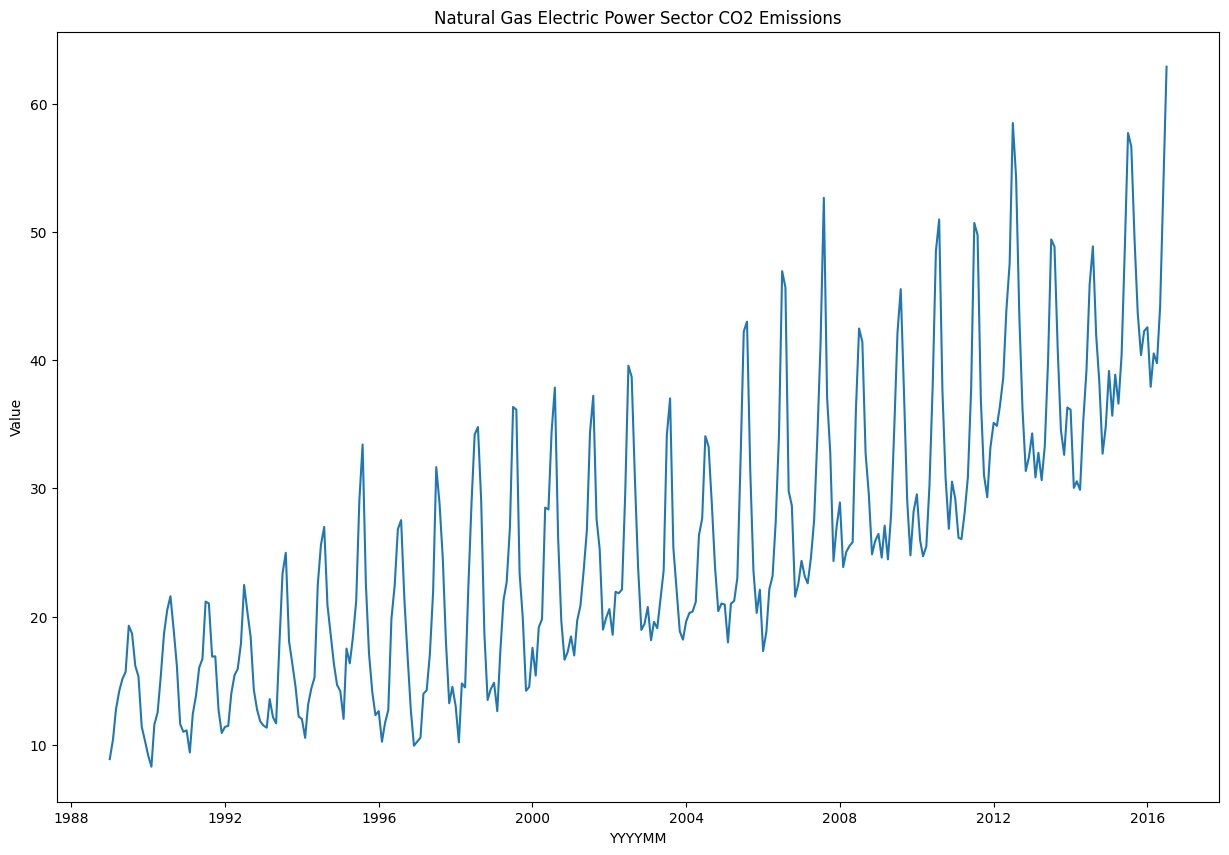

In [13]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'YYYYMM', y = 'Value', data=df1)
plt.title('Natural Gas Electric Power Sector CO2 Emissions')
plt.show()

In [14]:
df = df[df['Description'] == 'Natural Gas Electric Power Sector CO2 Emissions'][['Value']]
df.head()

,Value
YYYYMM,
1989-01-01,8.890
1989-02-01,10.420
1989-03-01,12.758
1989-04-01,14.187
1989-05-01,15.128


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x = df, model='multiplicative')
result

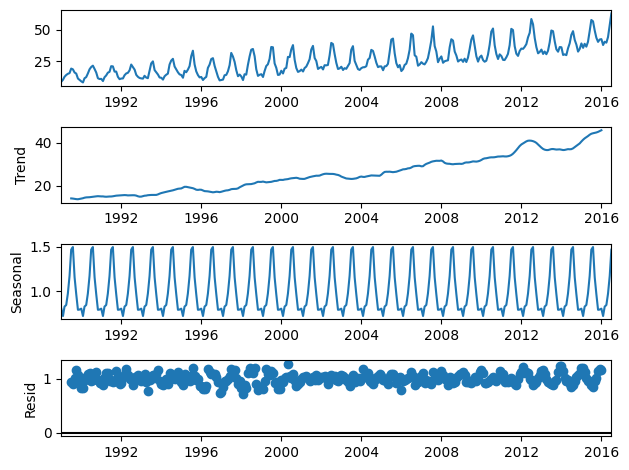

In [16]:
result.plot()
plt.show()

In [17]:
from pmdarima import auto_arima

In [18]:
stepwise_model = auto_arima( df, start_p=2, start_q= 2,
                             max_p=5, max_q=5, m=12,
                             start_P=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1410.658, Time=4.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1579.386, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1486.268, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1428.735, Time=0.34 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1408.727, Time=1.91 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1534.555, Time=0.24 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1410.645, Time=9.12 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=5.00 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1409.067, Time=17.32 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1406.827, Time=2.61 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1532.567, Time=0.34 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1408.735, Time=3.43 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1408.720, Time=8.03 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1469.442, Time=0.58 sec
 ARIMA(1,1,2)(1,1,2)[12

In [19]:
print(stepwise_model.aic())

1405.4394635142316


In [20]:
train = df.loc['2013-01-01':'2015-01-01']
test = df.loc['2015-01-01':]

In [21]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [22]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [23]:
future_forecast

2015-02-01    29.948344
2015-03-01    29.517230
2015-04-01    29.548282
2015-05-01    36.183982
2015-06-01    38.890319
2015-07-01    44.178720
2015-08-01    48.920696
2015-09-01    42.601167
2015-10-01    40.190437
2015-11-01    32.780816
2015-12-01    34.067583
2016-01-01    40.603561
2016-02-01    30.210473
2016-03-01    29.614287
2016-04-01    29.622373
2016-05-01    36.254877
2016-06-01    38.960770
2016-07-01    44.249109
2016-08-01    48.991075
Freq: MS, dtype: float64

In [24]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])

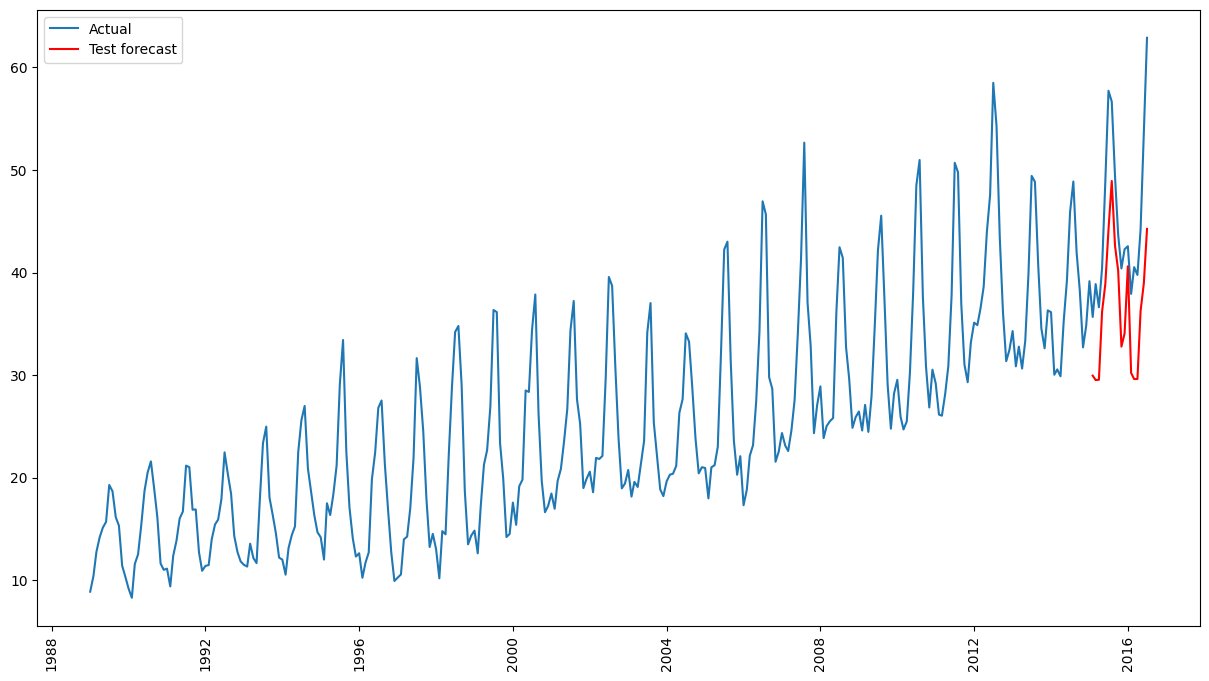

In [25]:
plt.figure(figsize=(15,8))
plt.plot(df, label='Actual')
plt.plot(future_forecast, label='Test forecast', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [26]:
# Dự đoán 36 tháng sau

In [27]:
future_forecast_36 = stepwise_model.predict(n_periods=len(test)+36)
future_forecast_36

2015-02-01    29.948344
2015-03-01    29.517230
2015-04-01    29.548282
2015-05-01    36.183982
2015-06-01    38.890319
2015-07-01    44.178720
2015-08-01    48.920696
2015-09-01    42.601167
2015-10-01    40.190437
2015-11-01    32.780816
2015-12-01    34.067583
2016-01-01    40.603561
2016-02-01    30.210473
2016-03-01    29.614287
2016-04-01    29.622373
2016-05-01    36.254877
2016-06-01    38.960770
2016-07-01    44.249109
2016-08-01    48.991075
2016-09-01    42.671546
2016-10-01    40.260816
2016-11-01    32.851195
2016-12-01    34.137962
2017-01-01    40.673939
2017-02-01    30.280852
2017-03-01    29.684666
2017-04-01    29.692752
2017-05-01    36.325256
2017-06-01    39.031148
2017-07-01    44.319487
2017-08-01    49.061454
2017-09-01    42.741924
2017-10-01    40.331195
2017-11-01    32.921573
2017-12-01    34.208340
2018-01-01    40.744318
2018-02-01    30.351230
2018-03-01    29.755044
2018-04-01    29.763130
2018-05-01    36.395634
2018-06-01    39.101527
2018-07-01    44

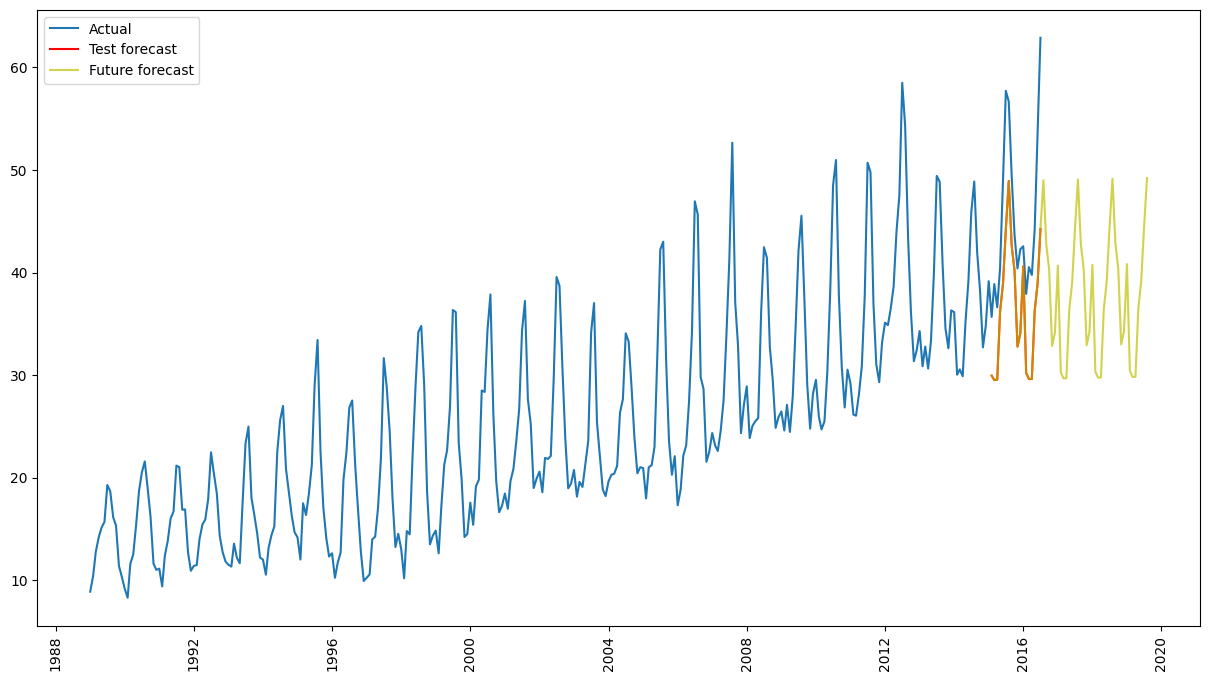

In [28]:
plt.figure(figsize=(15,8))
plt.plot(df, label='Actual')
plt.plot(future_forecast, label='Test forecast', color='red')
plt.plot(future_forecast_36, label='Future forecast', color='y', alpha = 0.7)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()